# Counterpart Synthesize Result In Each Round (Table 5)
In Table 5, we claimed to synthesize counterparts for 689 TensorFlow APIs and 712 PyTorch APIs after synthesizing for five rounds.

This cell will reproduce the numbers, all synthesized counterparts can be found at `data/working_dir/rq1/counterpart/tensorflow/counterparts` and `data/working_dir/rq1/counterpart/pytorch/counterparts`.

In [1]:
torch_round = [0,0,0,0,0]
tf_round = [0,0,0,0,0]
for i in range(5):
    with open(f"./data/working_dir/rq1/dllens/tensorflow/round{i+1}.txt", "r") as file:
        tf_round[i] = len(file.read().strip().split("\n"))
    with open(f"./data/working_dir/rq1/dllens/pytorch/round{i+1}.txt", "r") as file:
        torch_round[i] = len(file.read().strip().split("\n"))
print(tf_round, sum(tf_round))
print(torch_round, sum(torch_round))

[604, 37, 17, 14, 17] 689
[608, 47, 34, 12, 11] 712


# Comparison With TensorScope (Figure 3)

In Figure 3, we show that DLLens outperforms TensorScope by collecting **126.64% (689 v.s. 304)** more counterparts for TensorFlow APIs and **55.46% more for PyTorch APIs (712 v.s. 458)**.

Running the following two code blocks will reproduce our comparison result with TensorScope in Figure 3.

In [2]:
import os
from toolbox import rq1_load_tensorscope_counterparts
from utils.utils import load_apis, get_api_name
tf_total_list = load_apis("", "tensorflow")
torch_total_list = load_apis("", "pytorch")
tf_total_list = [get_api_name(i) for i in tf_total_list]
torch_total_list = [get_api_name(i) for i in torch_total_list]
tf_api = os.listdir("./data/working_dir/rq1/dllens/tensorflow/counterparts")
torch_api = os.listdir("./data/working_dir/rq1/dllens/pytorch/counterparts")
tf_api = [i.split(".json")[0] for i in tf_api]
torch_api = [i.split(".json")[0] for i in torch_api]
dllens_tf_api = set(tf_api)
dllens_torch_api = set(torch_api)
tensorscope_tf_api, tensorscope_torch_api = rq1_load_tensorscope_counterparts()

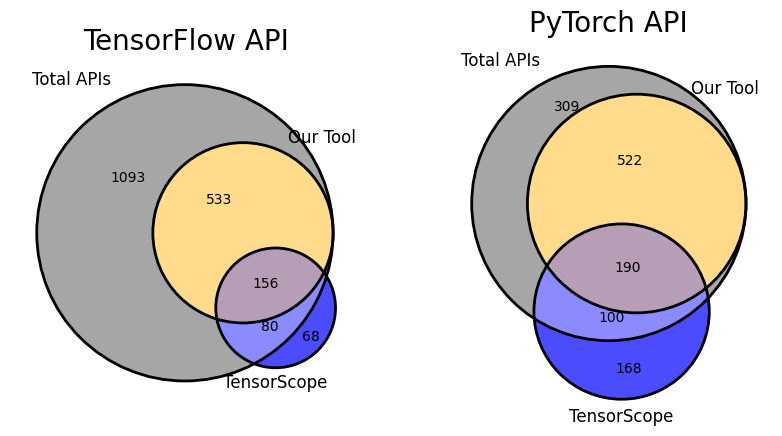

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Create a figure and axis object
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# color = ["#cf503d", "#1a3653"]
color = ["grey", "orange", "blue"]


venn_labels = ("Total APIs", 'Our Tool', 'TensorScope', )
venn_diagram = venn3([set(tf_total_list), dllens_tf_api, tensorscope_tf_api], set_labels=venn_labels, ax=axs[0], alpha=0.7, set_colors=(color[0], color[1], color[2]))
venn3_circles(subsets=[set(tf_total_list), dllens_tf_api, tensorscope_tf_api], ax=axs[0])


axs[0].set_title('TensorFlow API', fontsize=20)
axs[0].set_xlabel('')  # remove x-axis label
axs[0].set_ylabel('')  # remove y-axis label

venn_diagram = venn3([set(torch_total_list), dllens_torch_api, tensorscope_torch_api], set_labels=venn_labels, ax=axs[1], alpha=0.7, set_colors=(color[0], color[1], color[2]))
venn3_circles(subsets= [set(torch_total_list), dllens_torch_api, tensorscope_torch_api],  ax=axs[1])

axs[1].set_title('PyTorch API', fontsize=20)
axs[1].set_xlabel('')  # remove x-axis label
axs[1].set_ylabel('')  # remove y-axis label

import os
os.makedirs("./figures", exist_ok=True)
plt.savefig('./figures/counterpart_collection.pdf', format='pdf')

# Comparison on the distribution of unique property values (Figure 4)

You can run the following code block to reproduce the distribution of unique property values in Figure 4 of our submission.

2024-11-02 22:39:11.095078: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 22:39:12.285131: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


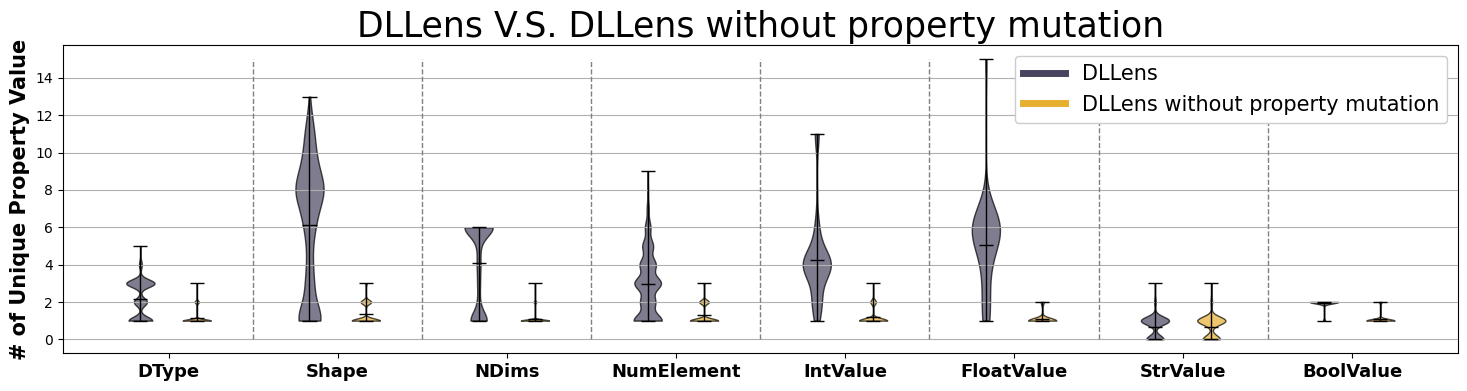

In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from toolbox import rq1_load_unique_input_properties
unique_values = rq1_load_unique_input_properties()
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 4))
plt.subplots_adjust(hspace=0.3)  # Adjust the width space between subplots

ax1.set_title("DLLens V.S. DLLens without property mutation", fontsize=25)
ax1.tick_params(axis='x')
ax1.set_ylabel('# of Unique Property Value', fontsize=15, fontweight='bold')

attributes = ["dtype", "shape", "ndims", "num_element", "integer_value", "float_value", "string_value", "boolean_value"]
data = []
for attr in attributes:
    data.append(unique_values["sample_inputs"][attr])
    data.append(unique_values["llm_inputs"][attr])

tool1color = '#48445F'
tool2color = '#E7AF30'
edgecolor = 'black'

positions = []
for i in range(len(attributes)):
    positions.append(i * 3 + 1)  # Position for Tool 1
    positions.append(i * 3 + 2)  # Position for Tool 2


violin1 = ax1.violinplot(data[0::2], positions=positions[0::2],showmeans=True,
                #   showmedians=True,
                  widths=0.5,
                )
for pc in violin1['bodies']:
    pc.set_color(tool1color)
    pc.set_edgecolor(edgecolor)
    pc.set_alpha(0.7)

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = violin1[partname]
    vp.set_edgecolor(edgecolor)
    vp.set_linewidth(1)

violin2 = ax1.violinplot(data[1::2], positions=positions[1::2],showmeans=True,
                #   showmedians=True,
                  widths=0.5,
                )

for pc in violin2['bodies']:
    pc.set_color(tool2color)
    pc.set_edgecolor(edgecolor)
    pc.set_alpha(0.7)

for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = violin2[partname]
    vp.set_edgecolor(edgecolor)
    vp.set_linewidth(1)

legend_elements = [Line2D([0], [0], color=tool1color, lw=5, label='DLLens'),
                   Line2D([0], [0], color=tool2color, lw=5, label='DLLens without property mutation'),
                   ]

plt.xticks([i * 3 + 1.5 for i in range(len(attributes))], [
    'DType', 
    'Shape', 
    'NDims',
    'NumElement',
    'IntValue',
    'FloatValue',
    'StrValue',
    'BoolValue'
], fontsize=13, fontweight='bold')
for i in range(3, len(attributes)*3, 3):
    ax1.vlines(i, 0, 15, colors='gray', linestyles='--', linewidth=1)


ax1.legend(handles=legend_elements,  loc='upper right', fancybox=True, framealpha=1.0, fontsize=15)
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)
# plt.show()
plt.savefig('./figures/counterpart_input_diversity.pdf', format='pdf', bbox_inches='tight')